In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import geopandas as gpd
from shapely.geometry import Point, Polygon
import geojson
import folium
from folium.plugins import HeatMap

In [62]:
dataset_siniestros = pd.read_csv('siniestros_limpio.csv')

In [63]:
dataset_siniestros.head(5)

,ID,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO,Rango_etario,NUMERO_VICTIMAS,FECHA,AAAA,MM,...,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,Barrios,dia_semana
0,2016-0001,CONDUCTOR,MASCULINO,19,2016-01-01,Menos de 20,1.0,2016-01-01,2016.0,1.0,...,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8.0,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,"['Villa Soldati', ' Villa Riachuelo', 'Villa L...",Viernes
1,2016-0002,CONDUCTOR,MASCULINO,70,2016-01-02,Entre 61-80,1.0,2016-01-02,2016.0,1.0,...,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9.0,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,"['Liniers', 'Mataderos', 'Parque Avellaneda']",Sábado
2,2016-0003,CONDUCTOR,MASCULINO,30,2016-01-03,Entre 21- 40,1.0,2016-01-03,2016.0,1.0,...,ENTRE RIOS AV. 2034,1.0,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO,"['Retiro', 'San Nicolás', 'Puerto Madero', 'Sa...",Domingo
3,2016-0004,CONDUCTOR,MASCULINO,18,NaN,Menos de 20,1.0,2016-01-10,2016.0,1.0,...,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8.0,Point (99840.65224780 94269.16534422),-58.465039,-34.680930,MOTO-SD,MOTO,SD,"['Villa Soldati', ' Villa Riachuelo', 'Villa L...",Domingo
4,2016-0005,CONDUCTOR,MASCULINO,29,2016-02-01,Entre 21- 40,1.0,2016-01-21,2016.0,1.0,...,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1.0,Point (106980.32827929 100752.16915795),-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS,"['Retiro', 'San Nicolás', 'Puerto Madero', 'Sa...",Jueves


In [64]:
dataset_siniestros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     717 non-null    object 
 1   ROL                    717 non-null    object 
 2   SEXO                   717 non-null    object 
 3   EDAD                   717 non-null    int64  
 4   FECHA_FALLECIMIENTO    648 non-null    object 
 5   Rango_etario           717 non-null    object 
 6   NUMERO_VICTIMAS        716 non-null    float64
 7   FECHA                  716 non-null    object 
 8   AAAA                   716 non-null    float64
 9   MM                     716 non-null    float64
 10  DD                     716 non-null    float64
 11  HORA                   716 non-null    object 
 12  HH                     716 non-null    object 
 13  LUGAR_DEL_HECHO        716 non-null    object 
 14  TIPO_DE_CALLE          716 non-null    object 
 15  Calle 

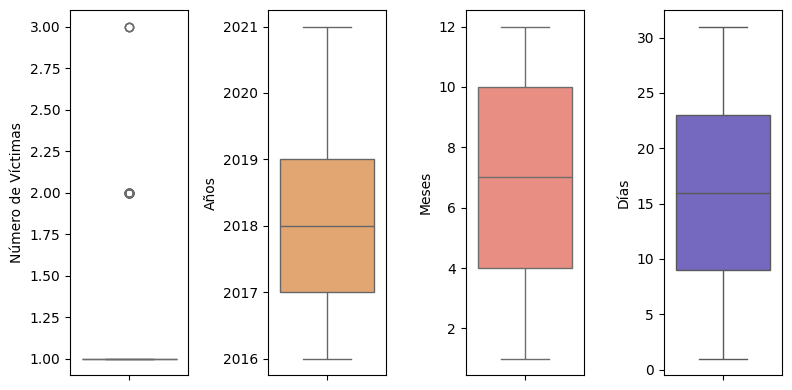

In [65]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(10, 4))

# Crear subplots para los gráficos 
plt.subplot(1, 5, 1) 
sns.boxplot(data=dataset_siniestros, y='NUMERO_VICTIMAS', color = "#FA8072")
plt.ylabel('Número de Víctimas')

plt.subplot(1, 5, 2) 
sns.boxplot(data=dataset_siniestros, y='AAAA', color = "#F4A460")
plt.ylabel('Años')

plt.subplot(1, 5, 3) 
sns.boxplot(data=dataset_siniestros, y='MM', color = "#FA8072")
plt.ylabel('Meses')

plt.subplot(1, 5, 4) 
sns.boxplot(data=dataset_siniestros, y='DD', color = "#6A5ACD")
plt.ylabel('Días')



# Ajustar espaciado entre subplots
plt.tight_layout()

plt.show()

Numeros de Victimas medias, desviacion etc

In [66]:
dataset_siniestros["NUMERO_VICTIMAS"].describe()

count    716.000000
mean       1.061453
std        0.257193
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: NUMERO_VICTIMAS, dtype: float64

Histograma de distribucion de victimas Fatales por siniestro

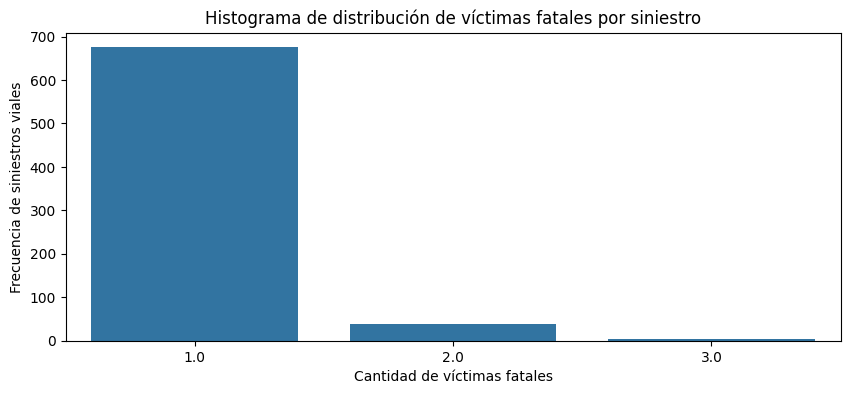

In [67]:
plt.figure(figsize=(10, 4))
# se filtran los valores sin datos o nulos 
df_filtrado = dataset_siniestros[dataset_siniestros["NUMERO_VICTIMAS"] != 0]

sns.countplot(df_filtrado, x='NUMERO_VICTIMAS')

plt.ylabel("Frecuencia de siniestros viales")
plt.xlabel("Cantidad de víctimas fatales")
plt.title("Histograma de distribución de víctimas fatales por siniestro")

plt.show()

Conclusión

La cantidad de víctimas fatales que arrojan los siniestros viales es de 1 (una), en la mayoría de los casos.

Según los datos estadísticos de la columna el 75% de los siniestros viales tienen 1 víctima.

Rara vez resulta un siniestro con tres víctimas fatales

***

Numero de victimas respecto al tiempo

In [68]:
rel_tiempo = dataset_siniestros.groupby(['AAAA', 'MM'])['NUMERO_VICTIMAS'].sum().reset_index()

In [69]:
rel_tiempo

,AAAA,MM,NUMERO_VICTIMAS
0,2016.0,1.0,8.0
1,2016.0,2.0,12.0
2,2016.0,3.0,15.0
3,2016.0,4.0,11.0
4,2016.0,5.0,7.0
...,...,...,...
67,2021.0,8.0,9.0
68,2021.0,9.0,4.0
69,2021.0,10.0,5.0
70,2021.0,11.0,8.0


convierto a entero para poder hacer los graficos que deseo

In [70]:
rel_tiempo['AAAA'] = rel_tiempo['AAAA'].astype('Int64')
rel_tiempo['MM'] = rel_tiempo['MM'].astype('Int64')
rel_tiempo['NUMERO_VICTIMAS'] = rel_tiempo['NUMERO_VICTIMAS'].astype('Int64')



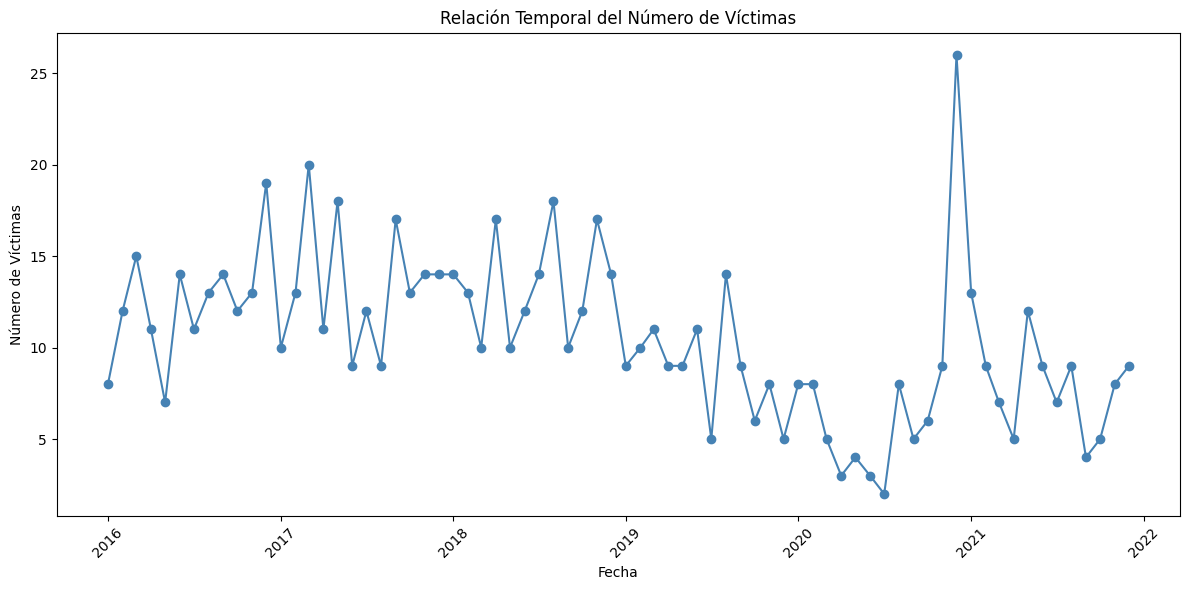

In [71]:

rel_tiempo["Fecha"] = rel_tiempo["AAAA"].astype(str) + '-' + rel_tiempo["MM"].astype(str)


rel_tiempo["Fecha"] = pd.to_datetime(rel_tiempo["Fecha"])


rel_tiempo = rel_tiempo.sort_values("Fecha")

plt.figure(figsize=(12, 6))
plt.plot(rel_tiempo["Fecha"], rel_tiempo["NUMERO_VICTIMAS"], marker='o', color='steelblue')

plt.title('Relación Temporal del Número de Víctimas')
plt.xlabel('Fecha')
plt.ylabel('Número de Víctimas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

AHORA HACEMOS LOS MISMO PERO POR MES

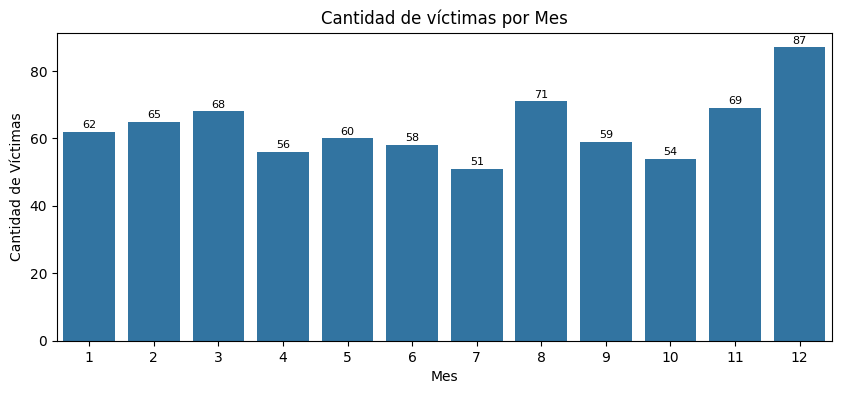

In [72]:

data = dataset_siniestros.groupby(['MM'])['NUMERO_VICTIMAS'].sum().reset_index()
data["MM"]=data["MM"].astype("Int64")
plt.figure(figsize=(10,4))
ax = sns.barplot(x='MM', y='NUMERO_VICTIMAS', data=data)
ax.set_title('Cantidad de víctimas por Mes')
ax.set_xlabel('Mes') ; ax.set_ylabel('Cantidad de Víctimas')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

AHORA POR DIA

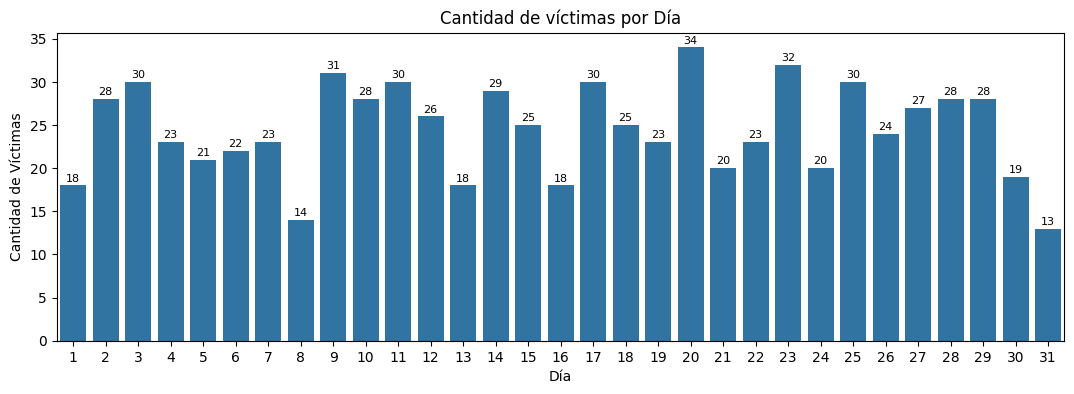

In [73]:

data = dataset_siniestros.groupby(['DD'])['NUMERO_VICTIMAS'].sum().reset_index()
data["DD"]=data["DD"].astype("Int64")


plt.figure(figsize=(13,4))

ax = sns.barplot(x='DD', y='NUMERO_VICTIMAS', data=data)
ax.set_title('Cantidad de víctimas por Día')
ax.set_xlabel('Día') ; ax.set_ylabel('Cantidad de Víctimas')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

por dia semanal victimas

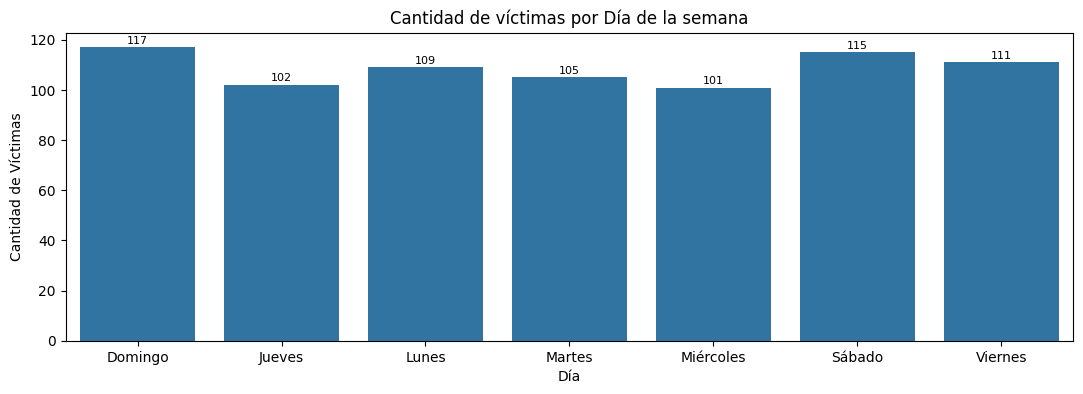

In [74]:
# Se agrupa por la cantidad de víctimas por dia
data = dataset_siniestros.groupby(['dia_semana'])['NUMERO_VICTIMAS'].sum().reset_index()
data["dia_semana"]=data["dia_semana"].astype("str")
plt.figure(figsize=(13,4))
ax = sns.barplot(x='dia_semana', y='NUMERO_VICTIMAS', data=data)
ax.set_title('Cantidad de víctimas por Día de la semana')
ax.set_xlabel('Día') ; ax.set_ylabel('Cantidad de Víctimas')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

In [75]:
dataset_siniestros['HH']

0       4
1       1
2       7
3       0
4       5
       ..
712     6
713    17
714     1
715     0
716    10
Name: HH, Length: 717, dtype: object

Convierto  HH  a int64 para poder graficar!

In [76]:

dataset_siniestros['HH'].replace('SD', np.nan, inplace=True)
dataset_siniestros['HH'] = dataset_siniestros['HH'].astype(float)
dataset_siniestros['HH'] = dataset_siniestros['HH'].astype('Int64')

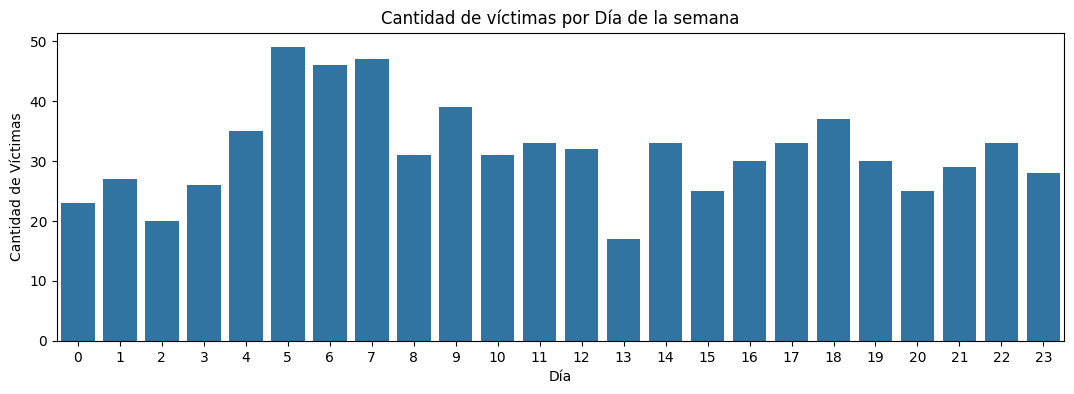

In [77]:
# Se agrupa por la cantidad de víctimas por dia
data = dataset_siniestros.groupby(['HH'])['NUMERO_VICTIMAS'].sum().reset_index()
data["HORA"]=data["HH"].astype("Int64")

# Se grafica
plt.figure(figsize=(13,4))

ax = sns.barplot(x='HORA', y='NUMERO_VICTIMAS', data=data)
ax.set_title('Cantidad de víctimas por Día de la semana')
ax.set_xlabel('Día') ; ax.set_ylabel('Cantidad de Víctimas')



# Se muestra el gráfico
plt.show()

***

cOMENZAMOS A VER LOS SINIESTROS RESPECTOS DE LA EDAD

hISTOGRAMA DE  ACCIDENTES RESPECTO  LA EDAD

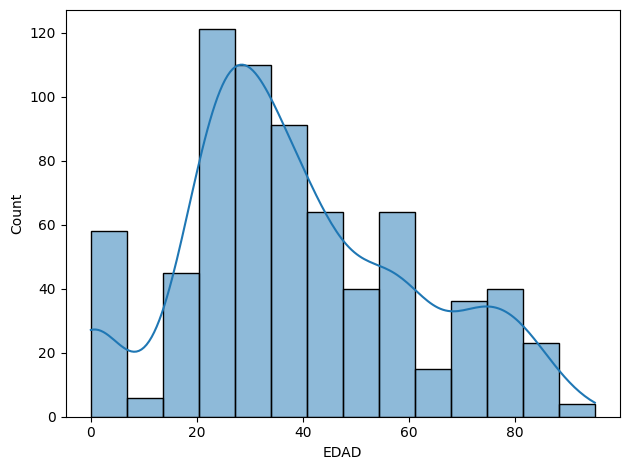

In [78]:
sns.histplot(dataset_siniestros['EDAD'], kde=True) #se agrega la línea de suavizado
plt.tight_layout()
plt.show()

Boxplot de edades

Text(0.5, 1.0, 'Box plot EDAD')

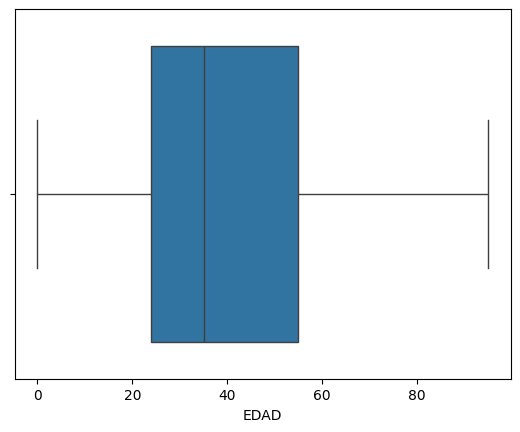

In [79]:
sns.boxplot(x=dataset_siniestros['EDAD'])
ax.set_title('Box plot EDAD')

In [80]:
dataset_siniestros["EDAD"].describe()

count    717.000000
mean      39.050209
std       22.010669
min        0.000000
25%       24.000000
50%       35.000000
75%       55.000000
max       95.000000
Name: EDAD, dtype: float64

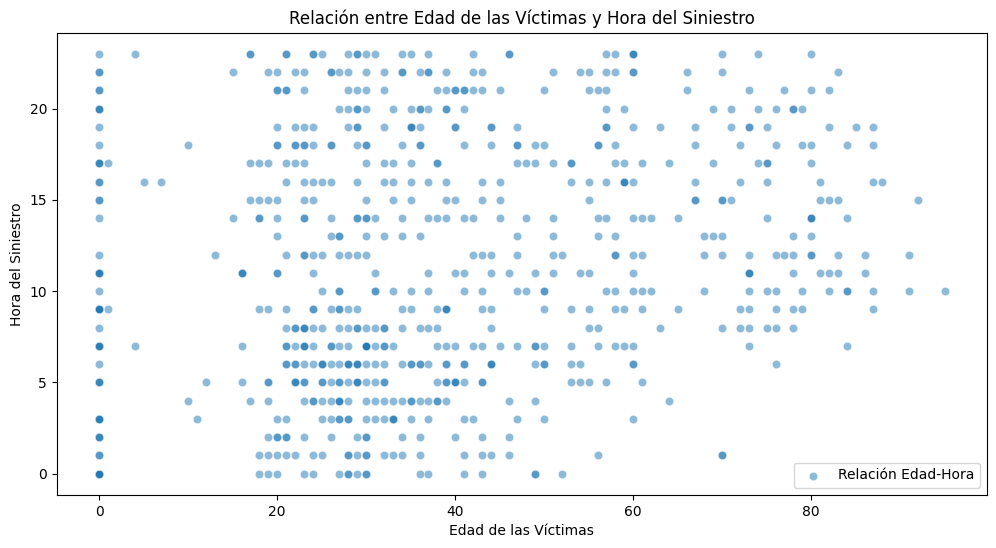

In [81]:

data = dataset_siniestros.groupby(['EDAD', "HH"])['NUMERO_VICTIMAS'].sum().reset_index()
data["EDAD"]=data["EDAD"].astype("Int64")
data["HH"]=data["HH"].astype("Int64")



# Crear un gráfico de dispersión para la relación entre edad y hora
plt.figure(figsize=(12, 6))

sns.scatterplot(data=dataset_siniestros, x='EDAD', y='HH', alpha=0.5, label='Relación Edad-Hora') # se utiliza alpha para transparencia de los puntos
plt.xlabel('Edad de las Víctimas')
plt.ylabel('Hora del Siniestro')
plt.title('Relación entre Edad de las Víctimas y Hora del Siniestro')

# Agregar una leyenda
plt.legend(loc='best') 
# Mostrar el gráfico
plt.show()

C:\Users\coco\AppData\Roaming\Python\Python311\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

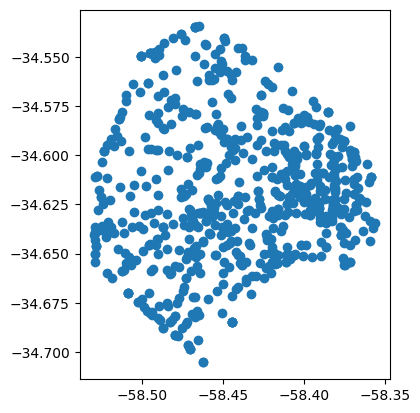

In [82]:
# Iniciamos CRS

crs={'init':'epsg:4326'}
#Definimos la geometría según nuestro dataset
geometry=[Point(xy) for xy in zip(dataset_siniestros["pos x"], dataset_siniestros["pos y"])]
geodata=gpd.GeoDataFrame(dataset_siniestros,crs=crs, geometry=geometry)

geodata.plot()

In [83]:
dataset_siniestros['COMUNA'] = dataset_siniestros['COMUNA'].astype('Int64')

In [84]:
Total_comuna=dataset_siniestros.groupby(["COMUNA", "Barrios"])["NUMERO_VICTIMAS"].sum().reset_index()
Total_comuna=Total_comuna.sort_values(by="NUMERO_VICTIMAS", ascending=False)
Total_comuna

,COMUNA,Barrios,NUMERO_VICTIMAS
1,1,"['Retiro', 'San Nicolás', 'Puerto Madero', 'Sa...",101.0
4,4,"['La Boca', 'Barracas', 'Parque Patricios', 'N...",85.0
9,9,"['Liniers', 'Mataderos', 'Parque Avellaneda']",79.0
8,8,"['Villa Soldati', ' Villa Riachuelo', 'Villa L...",71.0
7,7,"['Flores', 'Parque Chacabuco']",66.0
3,3,"['Balvanera', 'San Cristobal']",48.0
15,15,"['Chacarita', 'Villa Crespo', 'La Paternal', '...",47.0
12,12,"['Coghlan', 'Saavedra', 'Villa Urquiza', 'Vill...",43.0
14,14,['Palermo'],41.0
13,13,"['Núñez', 'Belgrano', 'Colegiales']",40.0


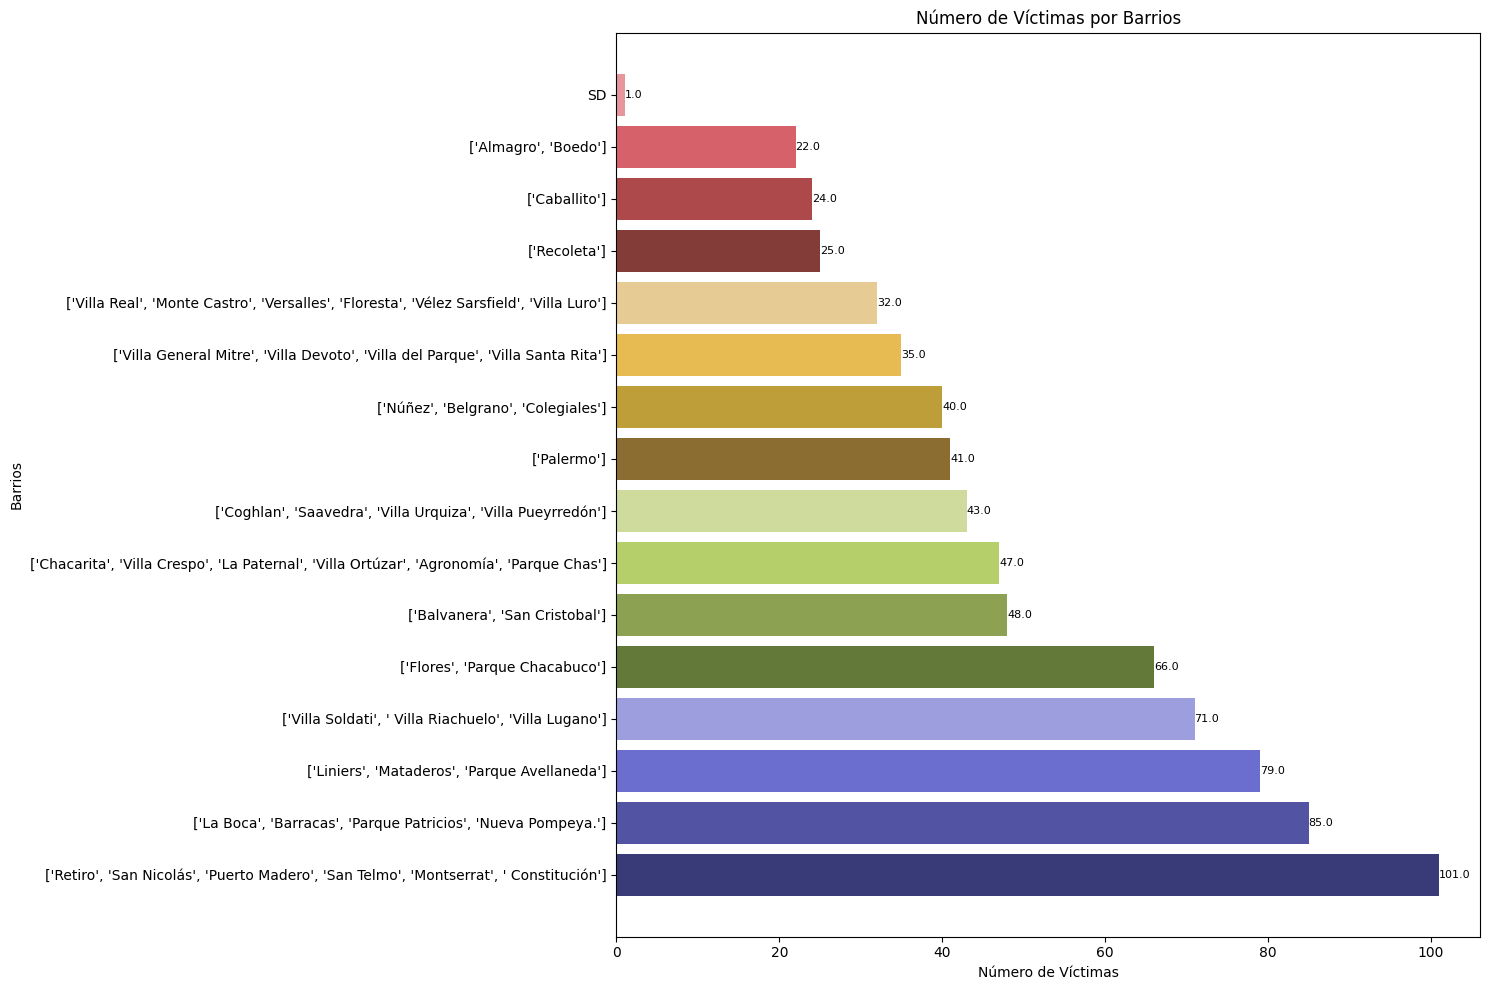

In [86]:
# Crear el gráfico de barras horizontales
plt.figure(figsize=(15, 10))

# Colores para las barras
colores = plt.cm.tab20b(range(len(Total_comuna)))

# Dibujar las barras horizontales
plt.barh(Total_comuna["Barrios"], Total_comuna["NUMERO_VICTIMAS"], color=colores)

# Etiquetas de eje x e y
plt.xlabel('Número de Víctimas')
plt.ylabel('Barrios')

# Título del gráfico
plt.title('Número de Víctimas por Barrios')

# Agregar el número de víctimas sobre cada barra
for i, v in enumerate(Total_comuna["NUMERO_VICTIMAS"]):
    plt.text(v, i, str(v), va='center', fontsize=8, color='black')


plt.tight_layout()
plt.show()